# Cross Validation Lab

## mine
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection

pycaret

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [207]:
# cross-val
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [208]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [209]:
from sklearn import metrics
scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

KFold divides all the samples in
groups of samples, called folds (if
, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using

folds, and the fold left out is used for test.

Example of 2-fold cross-validation on a dataset with 4 samples:

In [210]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


https://scikit-learn.org/stable/modules/grid_search.html#grid-search

????????????????????????????????

***

# start here for actual lab:

## The lab-book on Moodle is to perform k-fold cross validation with Polynomial Regression to choose the degree of the polynomial.

In this notebook, I am going to use the mtcars dataset as a worked example. You are to read this, try running the cells and understand what is going on in them. Get the logic behind the things I've tried

1) Looking at train_test_split and comparing training scores to test scores.
2) Getting cross validation scores to make a selection on which features to use.
3) Trying Polynomial Regression on a variable to see if it can improve things.

After this, I want you to repeat the procedure with the Diabetes dataset

First of all, let's look at the mtcars (1974 Motor Trend Cars) dataset and see what we can do with that.
<br><img src="images/mtcars.png" width="500"/><br>
Let's try more than one feature and see if this improves the model. We should be using separate sets for training and evaluating so let's try that now and see what happens

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [212]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


y is the response variable so let's slice that off

In [213]:
y = dfcars['mpg']

We have multiple possible X's let's put them aside too, we don't want the first two columns

So what we want to do is capture just the X in a 2D array.

In [214]:
allX = dfcars.iloc[:, 2:]

In [215]:
allX.head() # all our input data

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

I did random_state=42 so the answer is the same everytime I run this workbook.

Ok now we have two different datasets, train and test that we can use where appropriate. First of all, we just want to try different features

## 32 observations is a small dataset

I think wt would be a good feature to select so I'll go with that

Separating out just that column into what we are going to fit

In [218]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Now build the model

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

LinearRegression()

Let's look at the scores of both the training set and test set

In [221]:
model1.score(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.7701379909791617

In [222]:
model1.score(X_test, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.6879761857596269

There is a decent difference between the scores so maybe overfit a little. Anyway let's try a different feature

In [223]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [224]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

LinearRegression()

In [225]:
model2.score(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.650415775991287

In [226]:
model2.score(X_test, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.3996010170101514

Ok hp is even worse performing than wt. Not a good one to use

drat?

In [227]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [228]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

LinearRegression()

In [229]:
model3.score(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.45889832481878434

In [230]:
model3.score(X_test, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.4652147268834995

The best I tried was wt, the first one. Anyway let's try two variables

In [231]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [232]:
model4 = LinearRegression()
model4.fit(X_train, y_train) # better than weight only

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

LinearRegression()

In [233]:
model4.score(X_train, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.8321502526033073

That is a better training score, but what about the test score which is really what's important

In [234]:
model4.score(X_test, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.7880448439485949

That's the best we've had so far, so model4 is the best one of that,
## but you are using test set, which is wrong and now is contaminated. Instead, use cross validation!

![cvsk](cvsk.png)

## Instead, do Validation - This is the correct way that should be done!
Hold on, I've contradicted a little what I said in the "lecture". I'm using the test score to make decisions. I should not be doing this. I should use some form of validation. So here's an example of that

In [235]:
from sklearn.model_selection import cross_val_score

In [236]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

Let's try wt again

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})

y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]


In [238]:
from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [239]:
X_train = allX_train[["wt"]] # back to weight only (1 variable)
X_test = allX_test[["wt"]]

In [240]:
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model5, X_train, y_train) # on train, REMEMBER DONT TOUCH X
scores

# default is 5 splits

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [241]:
scores.mean()

0.5711128154689782

Now let's try the two variables, wt and hp again

In [242]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [243]:
model6 = LinearRegression()
scores6 = cross_val_score(model5, X_train, y_train)
scores6

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [244]:
scores6.mean() # BETTER THAN WEIGHT ONLY

0.6332786406507414

So the two together has a higher cross validation score that just one (from 0.57 (1 variable) to 0.63 (2 variables)). This means we should select the two variables over one 

What about 3? Let's try drat

In [245]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [246]:
model7 = LinearRegression()
scores7 = cross_val_score(model5, X_train, y_train)
scores7.mean()

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.6571279909053499

Slightly better than 2. It is not always the case that more features the better, just happened in the above example

Let's try three features again, but this time with carb instead of drat

In [247]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [248]:
model8 = LinearRegression()
scores8 = cross_val_score(model5, X_train, y_train)
scores8.mean()

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.6036599344425265

This score is worse than only using the two features wt and hp

## Our best so far (according to the cross val scores) has been model7, the one with ["wt","hp","drat"]. So let's build that model fully and then evaluate that

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})

y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]

from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [250]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
modelwhd = LinearRegression()

from sklearn.model_selection import cross_val_score
scoreswhd = cross_val_score(modelwhd, X_train, y_train) # on train, REMEMBER DONT TOUCH X
scoreswhd, scoreswhd.mean()

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

(array([0.21700448, 0.7520398 , 0.69926877, 0.79852065, 0.81880625]),
 0.6571279909053499)

In [251]:
modelwhd.fit(X_train, y_train)
modelwhd.score(X_test, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

0.7900492843805205

A score of .79 for the test set

## lets see if we can do better than Linear Regression:

## Polynomial Regression Example

![polykernel](polykernel.png)

I am going to use the 'wt' as a feature and see what happens with a polynomial regression model

Some notes about Polynomial and sklearn

### The `scikit-learn` interface

Scikit-learn is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in python by the incantation `import sklearn`.

The library has a very well defined interface. This makes the library a joy to use, and surely contributes to its popularity. As the [scikit-learn API paper](http://arxiv.org/pdf/1309.0238v1.pdf) [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).] says:

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: **an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data**. The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a `fit` method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

We'll use the "estimator" interface here, specifically the estimator `PolynomialFeatures`. The API paper again:

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X and yields as output a transformed version of X. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

To start with we have one **feature** `x` to predict `y`, what we will do is the transformation:

$$ x \rightarrow 1, x, x^2, x^3, ..., x^d $$

for some power $d$. Our job then is to **fit** for the coefficients of these features in the polynomial

$$ a_0 + a_1 x + a_2 x^2 + ... + a_d x^d. $$

In other words, we have transformed a function of one feature, into a (rather simple) **linear** function of many features. To do this we first construct the estimator as `PolynomialFeatures(d)`, and then transform these features into a d-dimensional space using the method `fit_transform`.

![fit_transform](images/sklearntrans.jpg)

Here is an example. 

## The reason for using `[[1],[2],[3]]` as opposed to `[1,2,3]` is that scikit-learn expects data to be stored in a two-dimensional array or matrix with size `[n_samples, n_features]`.

To transform `[1,2,3]` into [[1],[2],[3]] we need to do a reshape.

![reshape](images/reshape.jpg)

In [252]:
demo = np.array([1,2,3]).reshape(-1,1) # make into 2d array
demo

array([[1],
       [2],
       [3]])

In [253]:
from sklearn.preprocessing import PolynomialFeatures

In [254]:
PolynomialFeatures(5).fit_transform(demo) # it expands the polynomial

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

This is $x^0 , x^1, x^2, x^3, x^4, x^5$

## Example of poly in code:

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})

y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]

from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Let's try it with PolynomialFeatures(2) # squared is quadratic polynomial

In [256]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

In [257]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

In [258]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_test_poly, y_test))

# result quite overfitted bc the difference is quite big

0.8548475030225509
0.682183940466357


/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

now find the best hyperparameter, which degree polynomial is best?

Let's now do a loop for more of them and record all the scores in an array to see what is the best polynomial?

We will initialise the array as all zeros

In [259]:
from sklearn.metrics import mean_squared_error

In [260]:
max_p = 10
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
test_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_test = np.zeros(max_p+1)

In [261]:
for i in degrees: # i going up to 10
    if i != 0: # no point doing on 0 order polynomial
        X_train_poly = PolynomialFeatures(i).fit_transform(X_train) # expansion
        X_test_poly = PolynomialFeatures(i).fit_transform(X_test)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_test = polymodel.predict(X_test_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        test_scores[i] = polymodel.score(X_test_poly, y_test)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

In [262]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.9116272 ])

Now let's look at plots and things. I am going to keep doing error_train[1:], error_test[1:] so the 0 value is not counted

This will give us the degree with the lowest error in the test set

In [263]:
# What I'm doing is I'm looking at the best performance, which is the minimum.
# This is the minimum in my test error.

bestd = np.argmin(error_test[1:])+1

Text(0.5, 1.0, 'poly bestd for wt')

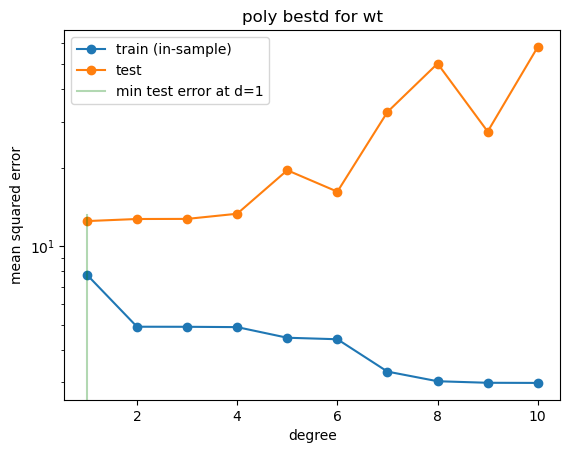

In [264]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestd, 0,0.5, color='g', label="min test error at d=%d"%bestd, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
plt.title("poly bestd for wt")

from the result, BEST TEST PERFORMANCE IS AT 1ST ORDER POLYNOMIAL AND BECOMES WORSE
TRAIN PERFORMANCE IMPROVES

So this right here a linear regression is actually the best regression to give me the best performance with this weight parameter.

So simple linear regression, which is Y is equal to MX plus C or W0 plus W1X, works the best for weight.

Notice how the training error here keeps getting better as the degrees increase.

But this doesn't actually mean you've got a better model or a better test error.

This is expected if you actually go and look or eyeball the data.

And that's often the first step in machine learning.

It just gives you so much information.

It's just to look at it with some scatter plots or pair plots or whatever it is.

If we scatter plot weight, we can see here that the data actually does look linear.

What these high order polynomials are doing is they're fitting some bizarre really high dimensional curve, but lots of or high order or high degree curve, but lots of Inflexion points.

And that's why your test error starts to go through the roof.

So it's doing something really, really bizarre.

You could have a plot of it and see what it looks like if you're interested.

But we can see that actually a linear model is the model that best fits this data.

# But:
Can anyone tell me what I've just done wrong again here?

I've done it wrong twice deliberately in this video.

If you think about it, what I'm just after doing is I'm making the same mistake as I did before.

I'm using my test performance and it just shows you how.

I'm just want to show you how easy it is to fall into this trap.

I am using my test error again to predict what is the best hyperparameter and it means that my test set is already corrupted.

I have used information from my test set in order to decide what the best model is.

Again, this is a bad idea.

#  the solution is for hyperparameter tuning is to use a validation set.

So the simple linear regression $y = w_0 + w_1x$ works best for wt

Notice how the training error keeps getting smaller as the degree increases, but this does not correspond to a better test error

This is expected if we looked at the scatter plot of wt vs mpg

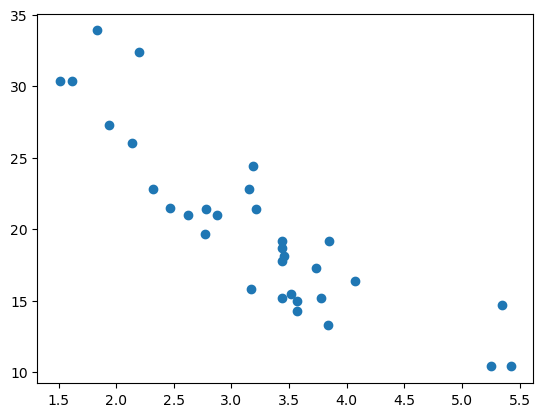

In [265]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

Relationship looks linear

## Some work for you to do

## Firstly - Validation


What we have done in picking a given degree $d$ as the best hypothesis is that we have used the test set as a training set. ---BAD IDEA!

If we choose the best $d$ based on minimizing the test set error, we have then "fit for" hyperparameter $d$ on the test set.  ---BAD IDEA!

In this case, the test-set error will underestimate the true out of sample error. Furthermore, we have **contaminated the test set** by fitting for $d$ on it; it is no longer a true test set.

Thus, we introduce a new **validation set** on which the complexity parameter $d$ is fit, and leave out a test set which we can use to estimate the true out-of-sample performance of our learner. The place of this set in the scheme of things is shown below:

![m:caption](images/train-validate-test.png)

We have split the old training set into a **new smaller training set** and a **validation set**, holding the old test aside for FINAL testing AFTER we have "fit" for complexity $d$. Obviously we have decreased the size of the data available for training further, but this is a price we must pay for obtaining a good estimate of the out-of-sample error 

![m:caption](images/train-validate-test-cont.png)

The validation process is illustrated in these two figures. We first loop over the complexity parameter $d$, the degree of the polynomials we will try and fit. Then for each degree $d$, we obtain a best fit model $g^-_d$ where the "minus" superscript indicates that we fit our model on the new training set which is obtained by removing ("minusing") a validation chunk (often the same size as the test chunk) from the old training set. We then "test" this model on the validation chunk, obtaining the validation error for the best-fit polynomial coefficients and for degree $d$. We move on to the next degree $d$ and repeat the process, just like before. We compare all the validation set errors, just like we did with the test errors earlier, and pick the degree $d_*$ which minimizes this validation set error.

![caption](images/train-validate-test3.png)

Having picked the hyperparameter $d_*$, we retrain on the entire old training-set to find the parameters of the polynomial of order $d_*$.  We now compute the test error on the test set as an estimate of the test error.

Thus the **validation** set is the set on which the hyperparameter is fit. This method of splitting the data $\cal{D}$ is called the **train-validate-test** split.

### Fit on training and predict on validation


We carry out this process for one training/validation split below. Note the smaller size of the new training set. We hold the test set at the same size.

## Firstly, let's split the training set up further into X_v_train, X_v_valid, y_v_train and y_v_valid using train_test_split again

In [266]:
# your code here
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)

In [267]:
X_v_train.shape

(18, 1)


>YOUR TURN HERE: Train on the smaller training set. Fit for d on the validation set.  Store the respective MSEs in `error_train` and `error_valid`. Then retrain on the entire training set using this d. Label the test set MSE with the variable `err`.

In [268]:
#Note code below hasn't been tested but is here for psuedocode suggestion

error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_valid=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.
#your code here
for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_v_train and X_v_valid
    X_c = PolynomialFeatures(d).fit_transform(X_v_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_v_valid)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(est.predict(X_c), y_v_train)
    error_valid[d] = mean_squared_error(est.predict(X_c_val), y_v_valid)
    score_train[d] = est.score(X_c, y_v_train)
    score_valid[d] = est.score(X_c_val, y_v_valid)
    

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

Plot the training error and validation error against the degree of the polynomial, and show the test set error at the $d$ which minimizes the validation set error.

Fit on WHOLE training set now. You will need to remake polynomial features on the whole training set. Test on TestSet

Try with Cross Validation

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [270]:
y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]

X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

# further split for validation:
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)
X_v_train.shape

(18, 3)

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

Text(0.5, 1.0, 'poly bestd for wt, hp, drat')

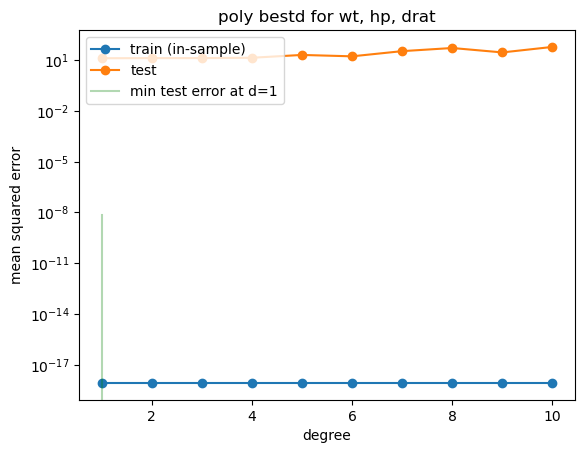

In [271]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_valid=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.
#your code here
for deg in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_v_train and X_v_valid
    X_c = PolynomialFeatures(d).fit_transform(X_v_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_v_valid)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[deg] = mean_squared_error(est.predict(X_c), y_v_train)
    error_valid[deg] = mean_squared_error(est.predict(X_c_val), y_v_valid)
    score_train[deg] = est.score(X_c, y_v_train)
    score_valid[deg] = est.score(X_c_val, y_v_valid)
bestdwthpdr = np.argmin(error_test[1:])+1

plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestdwthpdr, 0,0.5, color='g', label="min test error at d=%d"%bestdwthpdr, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
plt.title("poly bestd for wt, hp, drat")

# Try now with the Diabetes Dataset (more samples)

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Do similar to what I've done with the diabetes dataset

See if you can find a better combination of columns rather than using all of them

Pick one variable and see if a Polynomial Regression model could improve that one variable

Plan:

Keeping the Test Data separate:
▪ Iterate through all possible hyper-parameters (e.g. polynomial M=1, then M=2, then M=3)
1. Fix the hyperparameter (M=1 to start)
2. Randomly split the training data in k-folds
▪ Train a model using k − 1 folds of the dataset.
▪ Evaluate the model using the remaining fold.
▪ Record the error.
▪ Repeat until all folds have been a validation set.
3. Take the average error of all folds and store that result for the particular hyperparameter
4. Repeat from step 1, with the next hyperparameter
1.
▪ Choose model (e.g. order of polynomial) with minimum (average) error on the folds
▪ (not always done but often) Retrain the model on the complete training data (training set
+ validation set).
▪ You choose your model using validation, you can evaluate your final model with the
test set.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


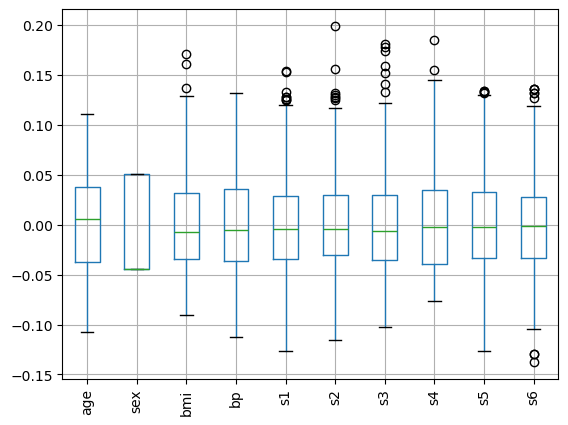

In [273]:
# Convert the dataset to a DataFrame
df = pd.DataFrame(diabetes.data, 
                    columns=diabetes.feature_names)
df.boxplot(rot=90)
df.head()

In [274]:
df.shape

(442, 10)

In [275]:
# Add target variable to the DataFrame
df['y'] = diabetes.target

print(df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Diabetes Data:", df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6      y  
0 -0.002592  0.019907 -0.017646  151.0  
1 -0.039493 -0.068332 -0.092204   75.0  
2 -0.002592  0.002861 -0.025930  141.0  
3  0.034309  0.022688 -0.009362  206.0  
4 -0.002592 -0.031988 -0.046641  135.0  
Shape of Diabetes Data: (442, 11)


In [276]:
# we dont want the last column

allX = df.iloc[:, :10]
allX.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [277]:
y=df['y']
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: y, dtype: float64

In [278]:
X_train = allX_train[["age","bmi","bp"]]
X_test = allX_test[["age","bmi","bp"]]

from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

# further split for validation:
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)
X_v_train.shape

KeyError: "None of [Index(['age', 'bmi', 'bp'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_valid=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.

for ds in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_v_train and X_v_valid
    X_c = PolynomialFeatures(d).fit_transform(X_v_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_v_valid)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[ds] = mean_squared_error(est.predict(X_c), y_v_train)
    error_valid[ds] = mean_squared_error(est.predict(X_c_val), y_v_valid)
    score_train[ds] = est.score(X_c, y_v_train)
    score_valid[ds] = est.score(X_c_val, y_v_valid)

bestdapi = np.argmin(error_test[1:])+1

plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestdapi, 0,0.5, color='g', label="min test error at d=%d"%bestdapi, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
plt.title("poly bestd for age, bp, bmi")